Reference: <br>
https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series/notebook

**Table of contents** <br>
1. [Importing time series data](#10) <br>
2. [Cleaning and preparing time series data](#11) <br>
[Autocorrelation and Partial Autocorrelation](#12) <br>
[Time series decomposition and Random walks](#13) <br>

[AR Models](#2) <br>
[MA Models](#1) <br>
[ARMA Models](#3) <br>
[ARIMA Models](#4) <br>
[VAR Models](#5) <br>
[State Space methods](#6) <br>
- [SARIMA models](#7) <br>
- [Unobserved Component Models](#8) <br>
- [Dynamic Factor models](#9) <br>


In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [25]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

# 1. Importing time series data <a id=10><a>
The required time series column is imported as a datetime column using **parse_dates** parameter and is also selected as index of the dataframe using **index_col** parameter.

In [3]:
humidity = pd.read_csv('humidity.csv/humidity.csv', index_col='datetime', parse_dates=['datetime'])
humidity.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,18.0,...,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,12.0,...,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,15.0,...,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,28.0,...,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,76.0,NaN,75.0,56.0,72.0,17.0,23.0,34.0,31.0,...,32.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
google = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [5]:
microsoft = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
microsoft.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT


# 2. Cleaning and preparing time series data <a id=11><a>

**method parameter** <br>
* ffill: propagates last valid observation to fill gaps. 
* bfill: propogate next valid observation to fill gaps.

In [6]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,...,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0


# 3. Visualizing the datasets

Text(0.5, 1.0, 'Kansas City')

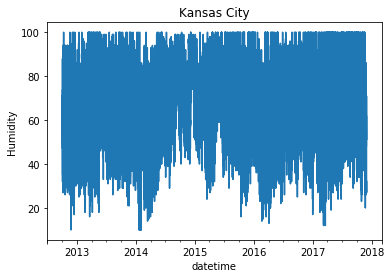

In [7]:
humidity['Kansas City'].plot()
plt.ylabel('Humidity')
plt.title('Kansas City')

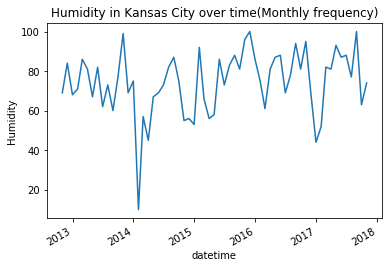

In [8]:
# asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
humidity["Kansas City"].asfreq('M').plot() 
plt.ylabel('Humidity')
plt.title('Humidity in Kansas City over time(Monthly frequency)')
plt.show()

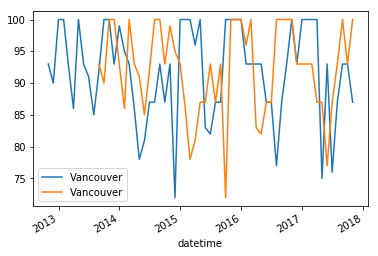

In [9]:
# Shifting and lags
# We can shift index by desired number of periods with an optional time frequency. 
# This is useful when comparing the time series with a past of itself
humidity["Vancouver"].asfreq('M').plot(legend=True)
shifted = humidity["Vancouver"].asfreq('M').shift(10).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_lagged'])
plt.legend(loc='best')
plt.show()

## Resampling
**Upsampling** - Time series is resampled from low frequency to high frequency(Monthly to daily frequency). It involves filling or interpolating missing data

**Downsampling** - Time series is resampled from high frequency to low frequency(Weekly to monthly frequency). It involves aggregation of existing data.

In [10]:
humidity.shape

(45252, 36)

In [11]:
# We downsample from hourly to 3 day frequency aggregated using mean
humidity_3day = humidity.resample('3D').mean()
humidity_3day.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,72.986111,67.666667,60.847222,62.152778,61.680556,67.833333,16.611111,20.958333,36.027778,45.916667,...,72.319444,66.138889,74.791667,78.000000,69.527778,70.041667,40.458333,61.458333,61.583333,56.333333
2012-10-04 13:00:00,40.500000,38.041667,71.708333,49.486111,73.666667,73.013889,17.597222,25.069444,21.069444,57.166667,...,77.611111,81.625000,89.333333,75.625000,65.250000,65.708333,46.180556,67.763889,67.763889,65.972222
2012-10-07 13:00:00,62.555556,47.222222,72.138889,56.722222,74.111111,70.125000,17.416667,29.722222,37.902778,45.791667,...,68.013889,65.972222,79.277778,76.069444,61.763889,64.750000,41.666667,63.611111,63.611111,60.847222
2012-10-10 13:00:00,83.763889,68.111111,70.888889,70.888889,64.708333,64.638889,48.791667,34.750000,33.347222,45.152778,...,66.805556,68.000000,71.430556,74.180556,56.000000,64.319444,31.541667,63.847222,63.847222,56.902778
2012-10-13 13:00:00,92.361111,86.944444,75.444444,85.041667,61.666667,64.444444,54.708333,35.513889,43.083333,56.666667,...,54.541667,58.166667,76.805556,66.902778,66.013889,66.458333,43.583333,63.597222,63.597222,56.833333


In [12]:
#downsampling
humidity_3day.shape

(629, 36)

In [13]:
# upsample from 3 day frequency to daily frequency
# pad method = ffill (fill values forward)
humidity_daily = humidity_3day.resample('D').pad()
humidity_daily.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-02,72.986111,67.666667,60.847222,62.152778,61.680556,67.833333,16.611111,20.958333,36.027778,45.916667,...,72.319444,66.138889,74.791667,78.000,69.527778,70.041667,40.458333,61.458333,61.583333,56.333333
2012-10-03,72.986111,67.666667,60.847222,62.152778,61.680556,67.833333,16.611111,20.958333,36.027778,45.916667,...,72.319444,66.138889,74.791667,78.000,69.527778,70.041667,40.458333,61.458333,61.583333,56.333333
2012-10-04,72.986111,67.666667,60.847222,62.152778,61.680556,67.833333,16.611111,20.958333,36.027778,45.916667,...,72.319444,66.138889,74.791667,78.000,69.527778,70.041667,40.458333,61.458333,61.583333,56.333333
2012-10-05,40.500000,38.041667,71.708333,49.486111,73.666667,73.013889,17.597222,25.069444,21.069444,57.166667,...,77.611111,81.625000,89.333333,75.625,65.250000,65.708333,46.180556,67.763889,67.763889,65.972222


In [14]:
humidity_daily.shape

(1885, 36)

# Autocorrelation and Partial Autocorrelation <a id=12><a>
* Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.
* Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

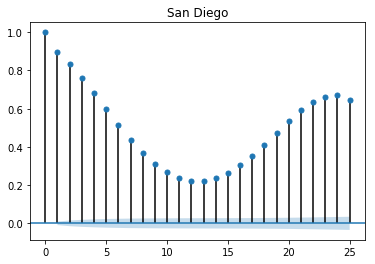

In [16]:
# Autocorrelation of humidity of San Diego
plot_acf(humidity["San Diego"],lags=25,title="San Diego")
plt.show()

As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.

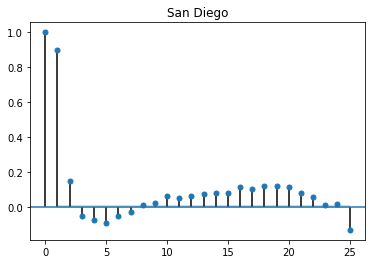

In [17]:
# Partial Autocorrelation of humidity of San Diego
plot_pacf(humidity["San Diego"],lags=25,title="San Diego")
plt.show()

Though it is statistically signficant, partial autocorrelation after first 2 lags is very low.

# Time series decomposition and Random walks <a id=13><a>
These are the components of a time series: <br>
* Trend - Consistent upwards or downwards slope of a time series
* Seasonality - Clear periodic pattern of a time series(like sine funtion)
* Noise - Outliers or missing values

In [18]:
humidity_sd = humidity['San Diego'].asfreq('M')

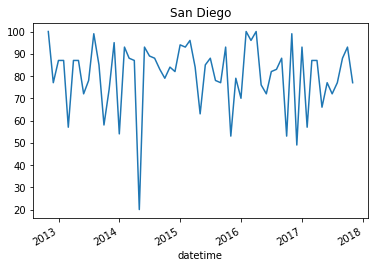

In [19]:
humidity_sd.plot(title = 'San Diego')

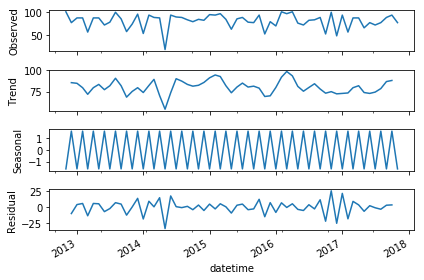

In [20]:
# Now, for decomposition...
import statsmodels.api as sm
decomposed_sd = sm.tsa.seasonal_decompose(humidity_sd,freq=2) # The frequency is 2 months
decomposed_sd.plot()
plt.show()

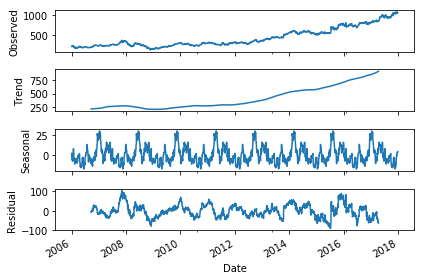

In [21]:
# rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"],freq=360) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

* There is clearly an upward trend in the above plot.
* You can also see the uniform seasonal change.
* Non-uniform noise that represent outliers and missing values

# White noise 
* Constant mean
* Constant variance
* Zero auto-correlation at all lags

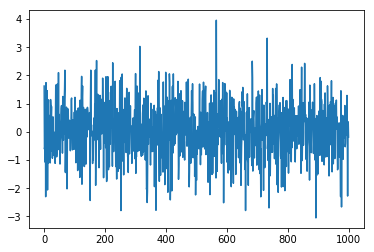

In [22]:
np.random.seed(1)

# Plotting white noise
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

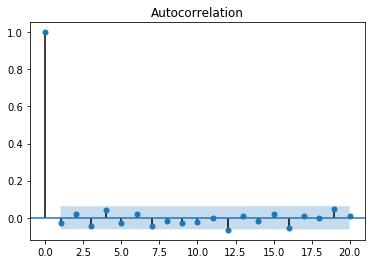

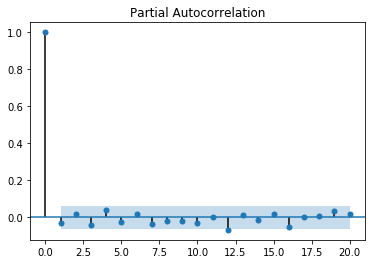

In [23]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plot_pacf(white_noise,lags=20)
plt.show()

# Random Walk
A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

In general if we talk about stocks, Today's Price = Yesterday's Price + Noise

$P_t = P_{t-1} + εt$

Random walks can't be forecasted because well, noise is random.

* Random Walk with Drift (drift (μ) is zero-mean)

$P_t - P_{t-1} = μ + εt$

**Regression test for random walk** <br>
$P_t = α + βP_{t-1} + εt$

Equivalent to $P_t - P_{t-1} = α + βP_{t-1} + εt$

Test: <br>
H0: β = 1 (This is a random walk)<br>
H1: β < 1 (This is not a random walk)

**Dickey-Fuller Test:** <br>
H0: β = 0 (This is a random walk) <br>
H1: β < 0 (This is not a random walk)

**Augmented Dickey-Fuller test** <br>
An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. It is basically Dickey-Fuller test with more lagged changes on RHS.

In [26]:
# Augmented Dickey-Fuller test on volume of google 
adf = adfuller(google["Volume"])
print("p-value of google: {}".format(float(adf[1])))

p-value of google: 6.51071960576806e-07


Google has p-value 0.0000006510 which is more than 0.05, null hypothesis is rejected and this is not a random walk.

## Generating a random walk

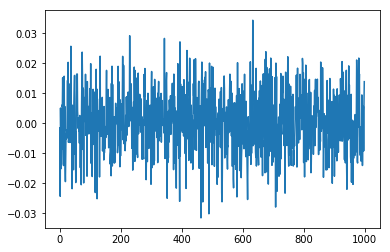

In [27]:
random_walk = np.random.normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
iplot(fig, filename='Basic Distplot')

# Stationarity
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.
* Strong stationarity: is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.
* Weak stationarity: is a process where mean, variance, autocorrelation are constant throughout the time

Stationarity is important as non-stationary series that depend on time have too many parameters to account for when modelling the time series. **diff() method** can easily convert a non-stationary series to a stationary series.

We will try to decompose seasonal component of the above decomposed time series.

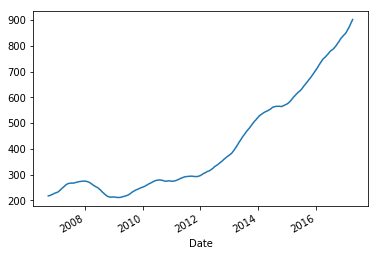

In [28]:
# The original non-stationary plot
decomposed_google_volume.trend.plot()

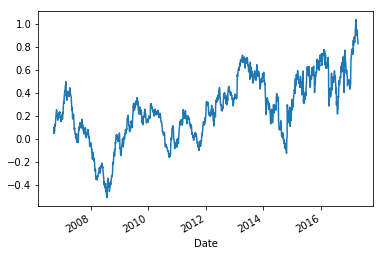

In [29]:
# The new stationary plot
decomposed_google_volume.trend.diff().plot()

# Modelling using statstools¶
**a. AR models** <a id=2></a> <br>
An autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc. The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation.

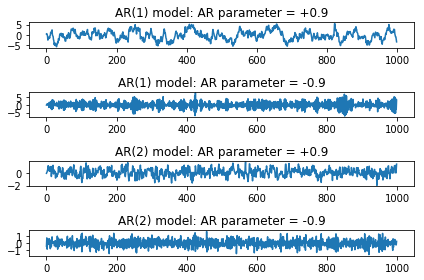

In [30]:
# AR(1) MA(1) model:AR parameter = +0.9
#rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)

# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)

# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)

# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.tight_layout()
plt.show()

In [31]:
# Forecasting a simulated model
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1390.784
Method:                       css-mle   S.D. of innovations              0.971
Date:                Tue, 16 Oct 2018   AIC                           2787.567
Time:                        18:54:23   BIC                           2802.290
Sample:                             0   HQIC                          2793.163
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2120      0.286     -0.742      0.458      -0.772       0.348
ar.L1.y        0.8934      0.014     63.062      0.000       0.866       0.921
                                    Roots           

$\varphi$ is around 0.9 which is what we chose as AR parameter in our first simulated model.

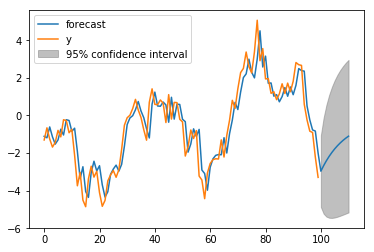

In [32]:
# Predicting simulated AR(1) model 
result.plot_predict(start=900, end=1010)
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 0.8748812427930303.


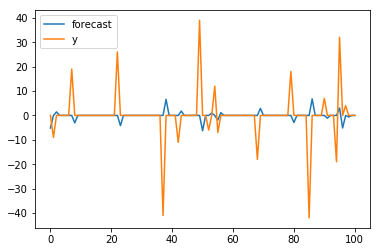

In [34]:
# Predicting humidity level of Montreal
humid = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=1000, end=1100)
plt.show()

In [35]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[900:1000].values, result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 7.132364822986317.


In [ ]:
# Predicting closing prices of google
humid = ARMA(google["Close"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=900, end=1010)
plt.show()

# MA models <a id=1></a>
The moving-average (MA) model is a common approach for modeling univariate time series. The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

*MA(1) model* <br>
$R_t = μ + ϵ_t1 + θϵ_{t-1}$

It translates to Today's returns = mean + today's noise + yesterday's noise

As there is only 1 lagged value in RHS, it is an MA model of order 1

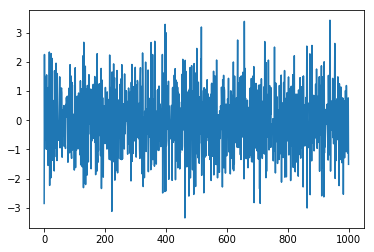

In [36]:
# Simulating MA(1) model
ar1 = np.array([1])
ma1 = np.array([1, -0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)
plt.plot(sim1)

In [37]:
model = ARMA(sim1, order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1402.736
Method:                       css-mle   S.D. of innovations              0.984
Date:                Tue, 16 Oct 2018   AIC                           2811.473
Time:                        18:55:08   BIC                           2826.196
Sample:                             0   HQIC                          2817.068
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0071      0.015     -0.472      0.637      -0.037       0.022
ma.L1.y       -0.5150      0.027    -19.078      0.000      -0.568      -0.462
                                    Roots           

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                45251
Model:                     ARMA(0, 3)   Log Likelihood             -153516.982
Method:                       css-mle   S.D. of innovations              7.197
Date:                Tue, 16 Oct 2018   AIC                         307043.965
Time:                        18:55:11   BIC                         307087.564
Sample:                             0   HQIC                        307057.686
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.031     -0.025      0.980      -0.061       0.060
ma.L1.y       -0.1621      0.005    -34.507      0.000      -0.171      -0.153
ma.L2.y        0.0386      0.005      8.316      0.0

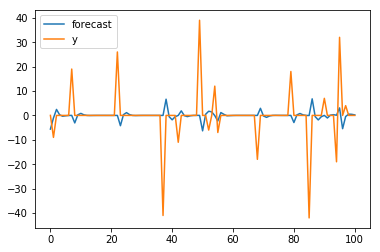

In [38]:
# Forecasting and predicting montreal humidity
model = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [39]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 11.345130161821896.


# ARMA models <a id=3></a>
Autoregressive–moving-average (ARMA) models provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression and the second for the moving average. It's the fusion of AR and MA models.

**ARMA(1,1) model** <br>
Rt = μ + ϕRt-1 + ϵt + θϵt-1  <br>
Basically, Today's return = mean + Yesterday's return + noise + yesterday's noise.

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3018
Model:                     ARMA(3, 3)   Log Likelihood              -55408.974
Method:                       css-mle   S.D. of innovations       22751607.294
Date:                Tue, 16 Oct 2018   AIC                         110833.948
Time:                        18:57:02   BIC                         110882.047
Sample:                             0   HQIC                        110851.244
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.03e+04   9913.815     -2.047      0.041   -3.97e+04    -866.498
ar.L1.y        0.2052      0.159      1.287      0.198      -0.107       0.518
ar.L2.y        0.7297      0.179      4.082      0.0

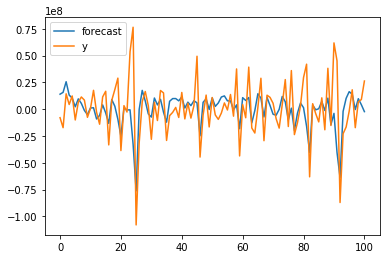

In [41]:
#Forecasting and predicting microsoft stocks volume
model = ARMA(microsoft["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [42]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 38038396.68999523.


# ARIMA models <a id=4></a>
An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity. ARIMA model is of the form: ARIMA(p,d,q): p is AR parameter, d is differential parameter, q is MA parameter

**ARIMA(1,0,0)** <br>
$y_t = a_1y_{t-1} + ϵt$

**ARIMA(1,0,1)** <br>
$y_t = a_1y_{t-1} + ϵt + b_1ϵ_{t-1}$

**ARIMA(1,1,1)** <br>
$Δy_t = a_1Δy_{t-1} + ϵt + b_1ϵ_{t-1} $ <br>
where $Δy_t = y_t - y_{t-1}$

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3017
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -56385.467
Method:                       css-mle   S.D. of innovations       31647215.014
Date:                Tue, 16 Oct 2018   AIC                         112778.933
Time:                        18:57:14   BIC                         112802.981
Sample:                             1   HQIC                        112787.581
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9984.0302   2.48e+05      0.040      0.968   -4.75e+05    4.95e+05
ar.L1.D.y     -0.8716      0.016    -53.758      0.000      -0.903      -0.840
ar.L2.D.y     -0.4551      0.016    -28.071      0.0

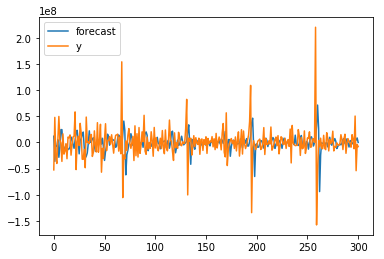

In [43]:
#Predicting the microsoft stocks volume
#rcParams['figure.figsize'] = 16, 6
model = ARIMA(microsoft["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

In [44]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 61937593.984936126.


# VAR models <a id=5></a>
Vector autoregression (VAR) is a stochastic process model used to capture the linear interdependencies among multiple time series. <br>
VAR models generalize the univariate autoregressive model (AR model) by allowing for more than one evolving variable. All variables in a VAR enter the model in the same way: each variable has an equation explaining its evolution based on its own lagged values, the lagged values of the other model variables, and an error term. <br>
VAR modeling does not require as much knowledge about the forces influencing a variable as do structural models with simultaneous equations: The only prior knowledge required is a list of variables which can be hypothesized to affect each other intertemporally.

e:\dsc\miniconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
e:\dsc\miniconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:     ['Close', 'Close']   No. Observations:                 3018
Model:                     VARMA(2,1)   Log Likelihood              -12185.167
                          + intercept   AIC                          24404.335
Date:                Tue, 16 Oct 2018   BIC                          24506.545
Time:                        19:01:54   HQIC                         24441.088
Sample:                             0                                         
                               - 3018                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                77.69, 78.78   Jarque-Bera (JB):   48251.10, 14925.71
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.32, 1.62   Skew:                      1.15, -0.03
Prob(H) (two-sided):            0.00,

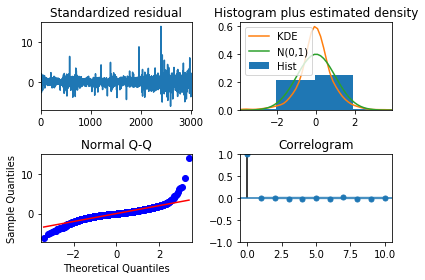

In [46]:
# Predicting closing price of Google and microsoft
train_sample = pd.concat([google["Close"].diff().iloc[1:],microsoft["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
plt.tight_layout()

# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

# State Space methods <a id=6><a>
A general state space model is of the form

$y_t=Z_tα_t+d_t+ε_t$

$αt=T_tα_{t−1}+c_t+R_tη_t$

where yt refers to the observation vector at time t, αt refers to the (unobserved) state vector at time t, and where the irregular components are defined as

$ε_t∼N(0,H_t)$

$η_t∼N(0,Q_t)$

## SARIMA models <a id=7> <a>
SARIMA models are useful for **modeling seasonal time series**, in which the mean and other statistics for a given season are not stationary across the years. <br>
The SARIMA model defined constitutes a straightforward extension of the nonseasonal autoregressive-moving average (ARMA) and autoregressive integrated moving average (ARIMA) models presented

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 3018
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -10098.215
Date:                Tue, 16 Oct 2018   AIC                          20216.430
Time:                        19:03:05   BIC                          20276.553
Sample:                             0   HQIC                         20238.049
                               - 3018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1015      0.048      2.136      0.033       0.008       0.195
ar.L1          0.2296      0.006     37.617      0.000       0.218       0.242
ar.L2          1.1225      0.005    222.923      0.0

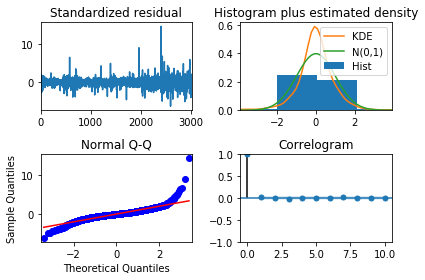

In [47]:
# Predicting closing price of Google'
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())

predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
plt.tight_layout()
# calculating error
#rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
#print("The root mean squared error is {}.".format(rmse))

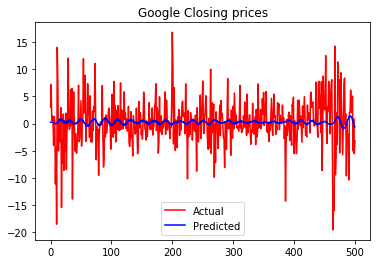

In [48]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

# Unobserved Component Models <a id=8><a>
A UCM decomposes the response series into components such as trend, seasons, cycles, and the regression effects due to predictor series. The following model shows a possible scenario:

http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/viewer.htm#etsug_ucm_details01.htm


                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 3018
Model:                    local level   Log Likelihood              -10116.511
Date:                Tue, 16 Oct 2018   AIC                          20237.023
Time:                        19:03:30   BIC                          20249.047
Sample:                             0   HQIC                         20241.346
                               - 3018                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular    47.7219      0.384    124.248      0.000      46.969      48.475
sigma2.level      5.033e-05      0.000      0.458      0.647      -0.000       0.000
Ljung-Box (Q):              

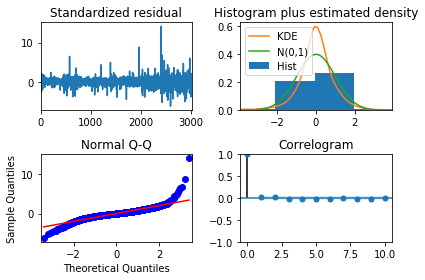

In [49]:
# Predicting closing price of Google'
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())

predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
plt.tight_layout()
# calculating error
#rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
#print("The root mean squared error is {}.".format(rmse))

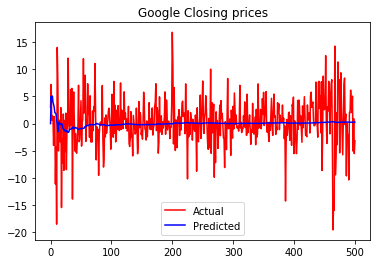

In [50]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

# Dynamic Factor models <a id=9><a>
Dynamic-factor models are flexible models for **multivariate time series** in which the observed endogenous variables are linear functions of exogenous covariates and unobserved factors, which have a vector autoregressive structure. The unobserved factors may also be a function of exogenous covariates. The disturbances in the equations for the dependent variables may be autocorrelated.

e:\dsc\miniconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                   Statespace Model Results                                  
Dep. Variable:                    ['Close', 'Close']   No. Observations:                 3018
Model:             DynamicFactor(factors=1, order=2)   Log Likelihood              -12197.974
Date:                               Tue, 16 Oct 2018   AIC                          24407.948
Time:                                       19:04:14   BIC                          24444.022
Sample:                                            0   HQIC                         24420.919
                                              - 3018                                         
Covariance Type:                                 opg                                         
Ljung-Box (Q):                83.88, 88.22   Jarque-Bera (JB):   49450.97, 15108.64
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.38, 1.63   Skew:                      1.14, -0

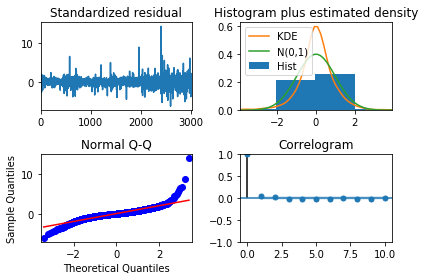

In [52]:
# Predicting closing price of Google and microsoft
train_sample = pd.concat([google["Close"].diff().iloc[1:],microsoft["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.DynamicFactor(train_sample, k_factors=1, factor_order=2)
result = model.fit(maxiter=1000,disp=False)
print(result.summary())

predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
plt.tight_layout()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))